# **Rayan International AI Contest**

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 24px;'><strong>Machine Learning & Deep Learning Course </strong></font>

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 20px;'><em>**Homework 1** || **Title**: Introduction to Machine Learning</em></font>

# Credit Card Fraud Detection

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

## Importing Libraries

In [3]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedBaggingClassifier

from sklearn.neural_network import MLPClassifier

## Load Dataset

In [4]:
# Dataset Link: https://www.kaggle.com/datasets/mojtabanafez/rayan-homework1/data
# !kaggle datasets download -d mojtabanafez/rayan-homework1

In [5]:
# !unzip ./rayan-homework1.zip

In [6]:
df = pd.read_csv('./creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']
X.shape, y.shape

((284807, 30), (284807,))

In [10]:
X.shape, y.shape

((284807, 30), (284807,))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((199364, 30), (85443, 30), (199364,), (85443,))

In [13]:
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)



**Student Task:**
1. Check Summary Statistics for the Dataset
2. Visualize Distribution of Classes
3. Check Correlation Matrix
4. Plot the Distribution of Some Selected Features
5. Additional Analysis (Choose at Least 5)
    * Example: Data Visualization (After Dimension Reduction), Outlier Detection, Feature Engineering, Insightful Plots, ...

In [14]:
# ### 2.1 Summary Statistics
# Display summary statistics for the dataset
######################################################
###################### TO DO #########################
######################################################
df.describe()
######################################################
######################################################
######################################################

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


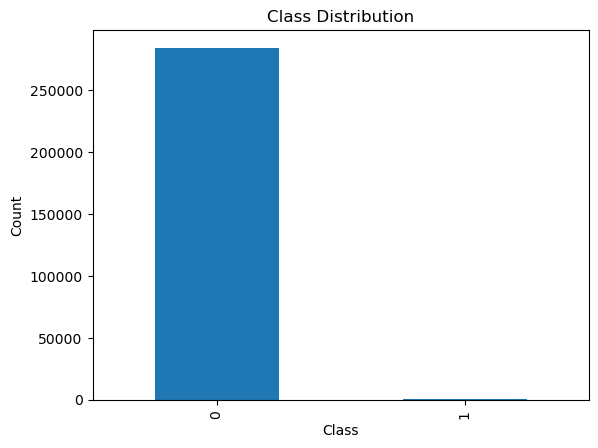

In [15]:
# ### 2.2 Class Distribution
# Visualize the class distribution
######################################################
###################### TO DO #########################
######################################################
plt.figure()
df["Class"].value_counts().plot.bar()
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()
######################################################
######################################################
######################################################

In [16]:
# Display the class distribution in percentages
######################################################
###################### TO DO #########################
######################################################
print("Class Distribution:")
df_prop = df["Class"].value_counts() / df["Class"].count()
df_prop.rename("Proportion", inplace=True)
print(df_prop)
######################################################
######################################################
######################################################

Class Distribution:
Class
0    0.998273
1    0.001727
Name: Proportion, dtype: float64


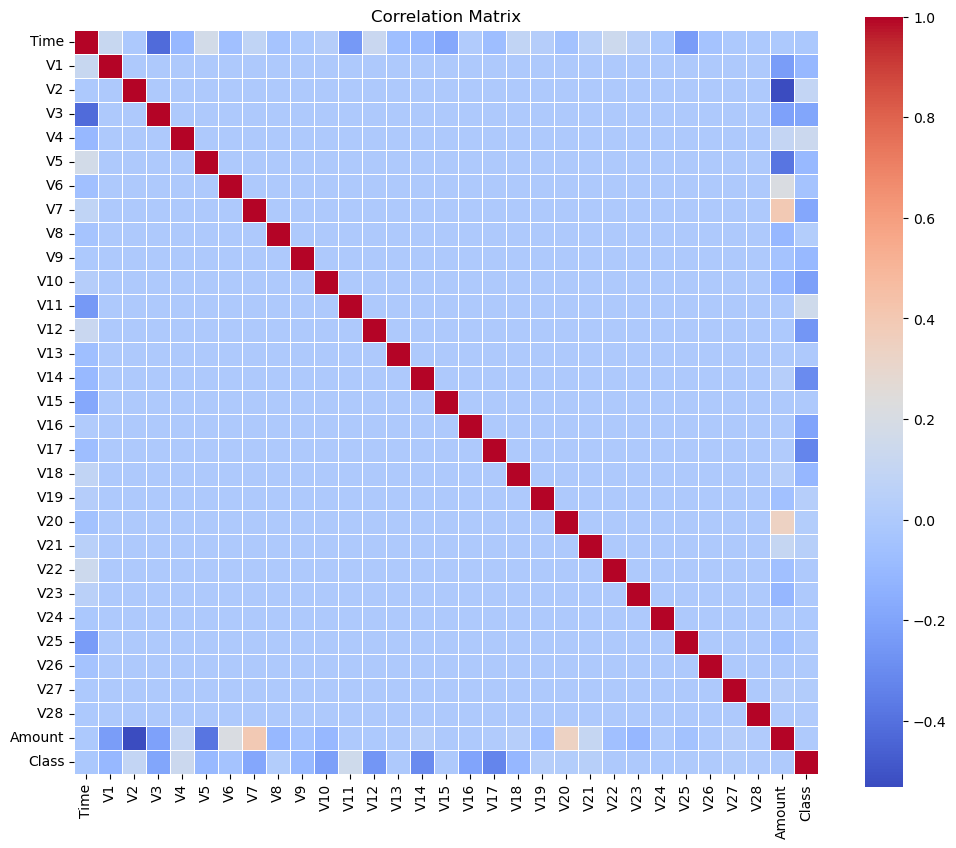

In [17]:
# ### 2.3 Correlation Matrix
# Compute the correlation matrix
######################################################
###################### TO DO #########################
######################################################
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap="coolwarm", linewidths=0.5, square=True)
plt.title("Correlation Matrix")
plt.show()
######################################################
######################################################
######################################################

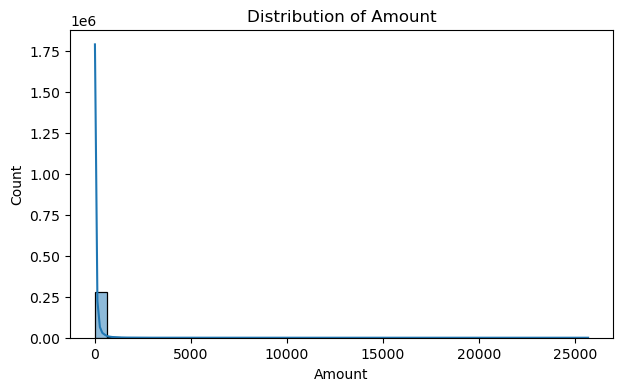

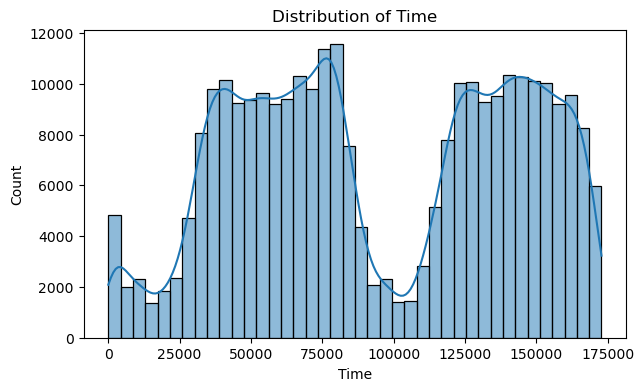

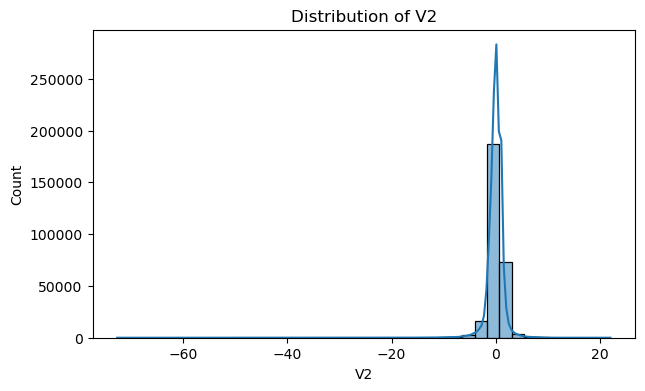

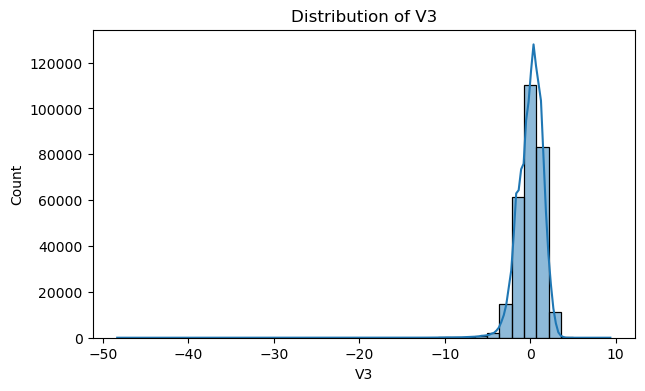

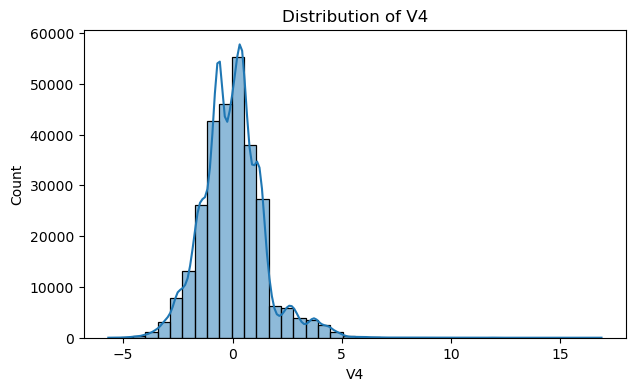

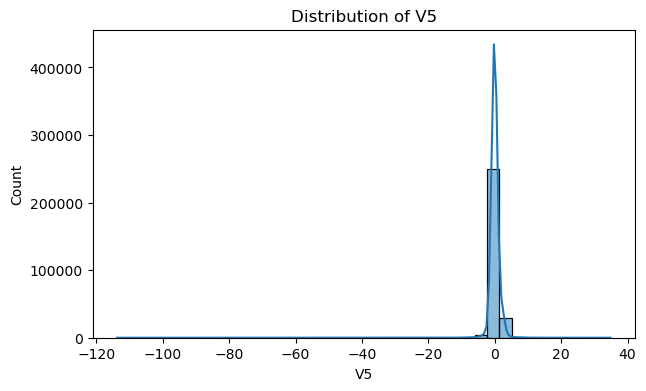

In [18]:
# ### 2.4 Feature Distributions
# Plot the distribution of a few selected features
######################################################
###################### TO DO #########################
######################################################
for x in ["Amount", "Time", "V2", "V3", "V4", "V5"]:
    plt.figure(figsize=(7, 4))
    sns.histplot(df, x=x, bins=40, kde=True)
    plt.title(f"Distribution of {x}")
    plt.show()
######################################################
######################################################
######################################################

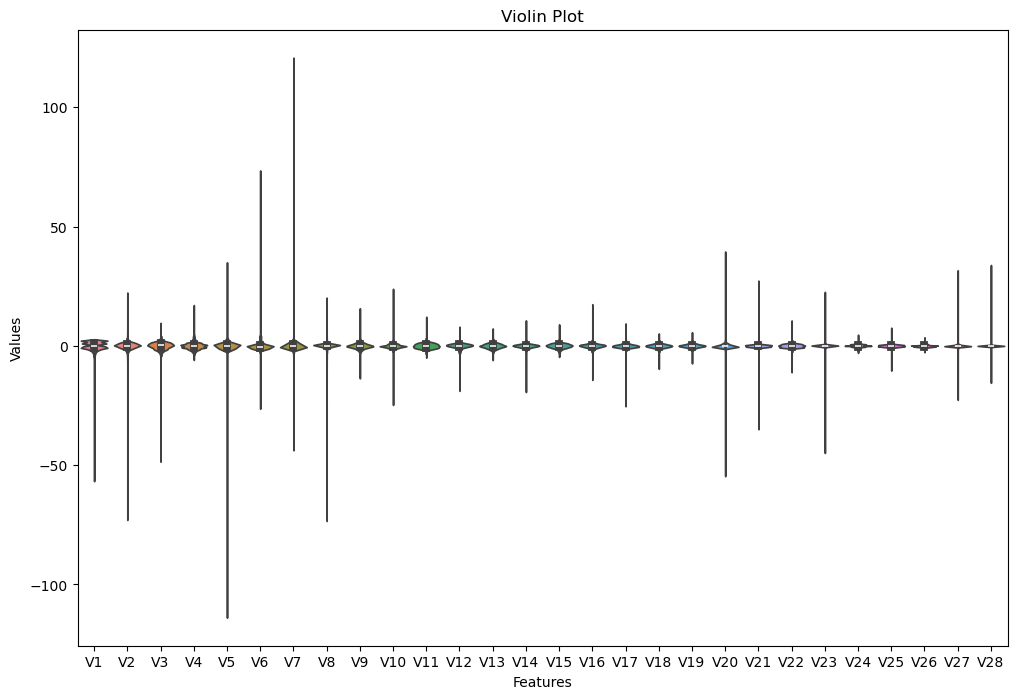

In [19]:
##########################################################
### You can add more creative analysis to learn more...###
##########################################################
plt.figure(figsize=(12,8))
vdf = df.drop(["Time", "Amount", "Class"], axis=1)
sns.violinplot(vdf)
plt.xlabel("Features")
plt.ylabel("Values")
plt.title("Violin Plot")
plt.show()
##########################################################
##########################################################
##########################################################

## Student Question

1. Describe at least two major challenges in the dataset based on your EDA findings.
2. Analyze the correlation matrix of the features.
3. Is your data linearly separable? Please provide a rationale.

  **Student Answer:**

1. The data is highly imbalanced, that is, the fraud class has extremenly less records than nonfraud class. On the other hand, the values of feature are not standardized or normalized.

2. The main diagonal of correlation matrix is 1, as each column with itself is linearly correlated. Most other values are near zero, meaning that the features are mostly not linearly correlated with each other. Few features are weakly correlated with the `Amount` columns (about 0.5 or -0.5).

3. No feature is strongly linearly correlated with `Class` column, the data is not linearly separable. In addition, after performing Prinipal Component Analysis (PCA), the data points are not linearly separable in 2D embedded space. Thus, until we don't find a linear classifier (a classfier with a hyperplane decision boundary in $n$-dim space), we can't say the data is linearly separable or not. But as there are noises across the features of this dataset, we can at least claim that we may have a significant number of outlier data points, and the data is not completely linearly separable.

## Data Preprocessing

Based on the challenges you've identified, recommend preprocessing methods to use during training to enhance model performance.

Some popular preprocessing techniques you can search about and learn include:

* Data Cleaning (Outlier Detection and Treatment, Handling Missing Values, ...)
* Data Transformation (Normalization, Standardization, ...)
* Feature Engineering (Feature Creation, Feature Selection, ...)
* Data Reduction (Dimensionality Reduction, Sampling, ...)
* Resampling Techniques (Oversampling or Undersampling)
* Handling Imbalanced Data
* ...


### Downsampling and Upsampling Train Dataset

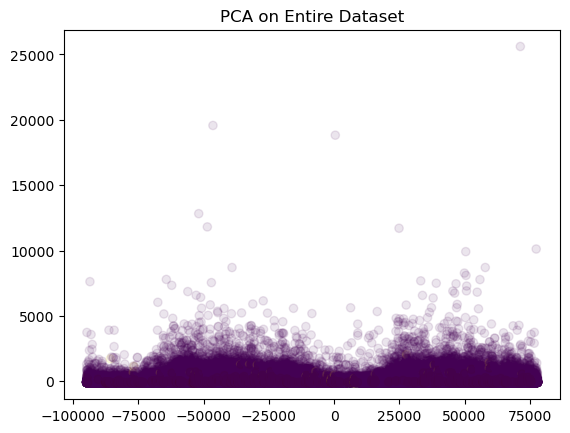

In [20]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.1)
plt.title("PCA on Entire Dataset")
plt.show()

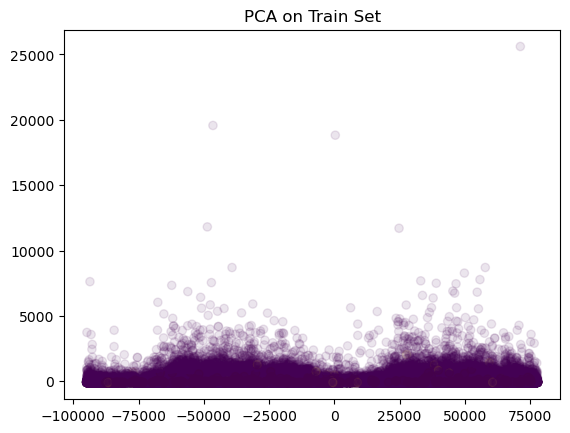

In [21]:
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train)

plt.figure()
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, alpha=0.1)
plt.title("PCA on Train Set")
plt.show()

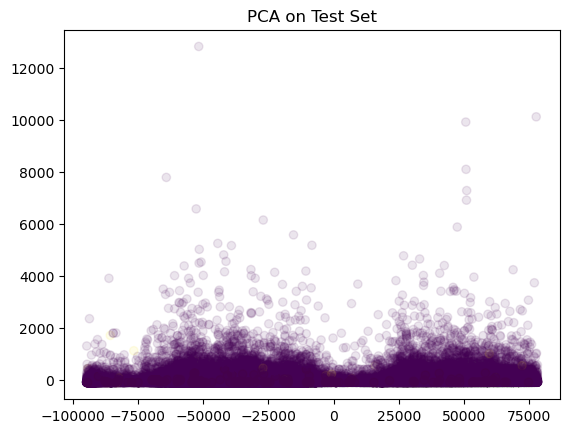

In [22]:
pca = PCA(n_components=2, random_state=42)
X_test_pca = pca.fit_transform(X_test)

plt.figure()
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, alpha=0.1)
plt.title("PCA on Test Set")
plt.show()

In [23]:
rus = RandomUnderSampler(random_state=42)
X_train_unsampled, y_train_unsampled = rus.fit_resample(X_train, y_train)

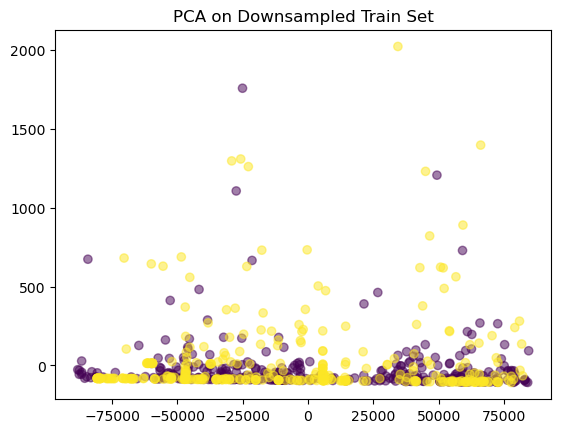

In [24]:
pca = PCA(n_components=2, random_state=42)
X_train_unsampled_pca = pca.fit_transform(X_train_unsampled)

plt.figure()
plt.scatter(X_train_unsampled_pca[:, 0], X_train_unsampled_pca[:, 1], c=y_train_unsampled, alpha=0.5)
plt.title("PCA on Downsampled Train Set")
plt.show()

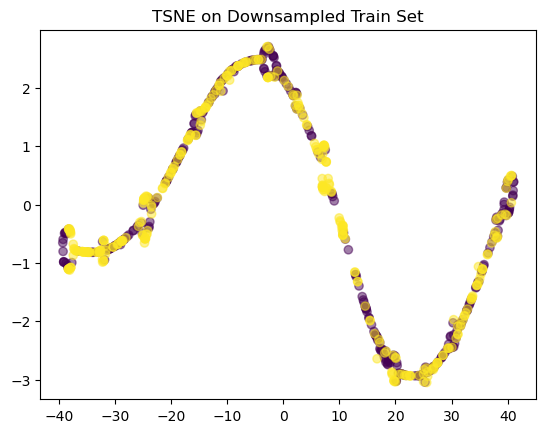

In [25]:
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
X_train_unsampled_tsne = tsne.fit_transform(X_train_unsampled)

plt.figure()
plt.scatter(X_train_unsampled_tsne[:, 0], X_train_unsampled_tsne[:, 1], c=y_train_unsampled, alpha=0.5)
plt.title("TSNE on Downsampled Train Set")
plt.show()

In [26]:
smote = SMOTE(random_state=42)
X_train_upsampled, y_train_upsampled = smote.fit_resample(X_train, y_train)

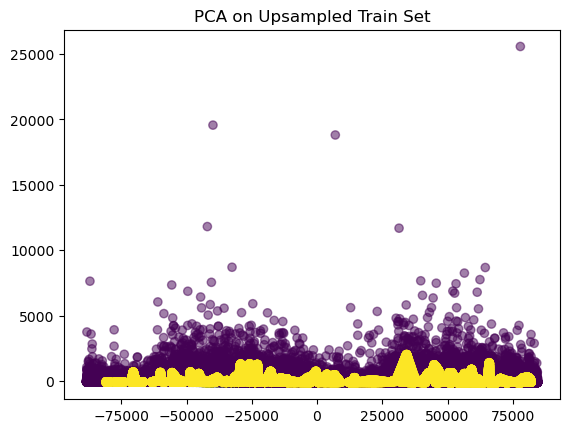

In [27]:
pca = PCA(n_components=2, random_state=42)
X_train_upsampled_pca = pca.fit_transform(X_train_upsampled)

plt.figure()
plt.scatter(X_train_upsampled_pca[:, 0], X_train_upsampled_pca[:, 1], c=y_train_upsampled, alpha=0.5)
plt.title("PCA on Upsampled Train Set")
plt.show()

In [28]:
X.shape, y.shape

((284807, 30), (284807,))

In [29]:
X_train.shape, y_train.shape

((199364, 30), (199364,))

In [30]:
X_train_unsampled.shape, y_train_unsampled.shape

((688, 30), (688,))

In [31]:
X_train_upsampled.shape, y_train_upsampled.shape

((398040, 30), (398040,))

In [32]:
X_test.shape, y_test.shape

((85443, 30), (85443,))

### Normalization

In [33]:
######################################################
###################### TO DO #########################
######################################################
transformer = StandardScaler().fit(X_train)
X_train_scaled = transformer.transform(X_train)
X_test_scaled = transformer.transform(X_test)

transformer = StandardScaler().fit(X_train_unsampled)
X_train_unsampled_scaled = transformer.transform(X_train_unsampled)
X_test_unsampled_scaled = transformer.transform(X_test)

transformer = StandardScaler().fit(X_train_upsampled)
X_train_upsampled_scaled = transformer.transform(X_train_upsampled)
X_test_upsampled_scaled = transformer.transform(X_test)
######################################################
######################################################
######################################################

In [34]:
######################################################
###################### TO DO #########################
######################################################
pass
######################################################
######################################################
######################################################

In [35]:
##########################################################
#You can add more creative preprocessing to learn more...#
##########################################################
pass
##########################################################
##########################################################
##########################################################

## Training

1. Train your model on the preprocessed and unpreprocessed training data.
2. Report followning evaluaiton metrics: Accuracy, Accuracy, Recall, Precision, Confusion Matrix
3. Evaluation your best model using K-Fold Cross Validation
3. Crucial Step: Enhance Your Model's Performance

**Please note:** The results in our cell output represent the minimum achievable. Try to surpass these results and analyze multiple ideas and attempts.








In [40]:
def evalute(y_test, y_pred, model):
    print(classification_report(y_test, y_pred))

    plt.figure()
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues")
    plt.title("Confusion Matrix")
    plt.show()

### Logistic Regression

#### Original Dataset

In [35]:
######################################################
###################### TO DO #########################
######################################################

lr = LogisticRegression(random_state=42)
cv = GridSearchCV(
    lr,
    {
        "C": np.logspace(-3, 3, 7),
        "penalty": ["l1", "l2"]
    },
    cv=10,
    verbose=1
)
cv.fit(X_train_scaled, y_train)

print("\nCross-Validation Grid Search using Logistic Regression on Original Dataset")
print("Tuned Hyperparameters:", cv.best_params_)
print("Accuracy:", cv.best_score_)

######################################################
######################################################
######################################################

Fitting 10 folds for each of 14 candidates, totalling 140 fits

Cross-Validation Grid Search using Logistic Regression on Original Dataset
Tuned Hyperparameters: {'C': np.float64(100.0), 'penalty': 'l2'}
Accuracy: 0.9992225273858241


Performance of Best Logistic Regression Model Trained on Original Dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85336
           1       0.61      0.85      0.71       107

    accuracy                           1.00     85443
   macro avg       0.81      0.92      0.86     85443
weighted avg       1.00      1.00      1.00     85443



<Figure size 640x480 with 0 Axes>

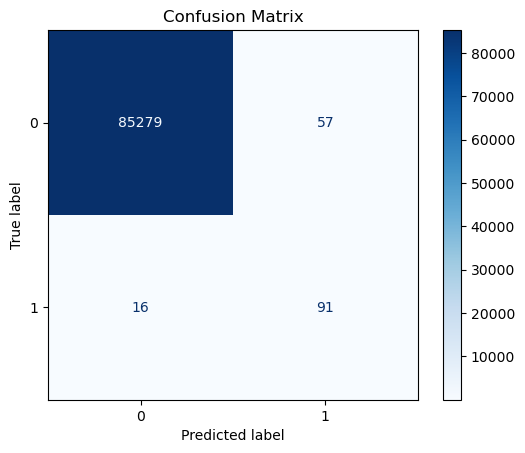

In [36]:
##################################### TO DO #######################################
## Feel free to add more cells and employ creative ideas to enhance performance. ##
###################################################################################
print("Performance of Best Logistic Regression Model Trained on Original Dataset\n")
y_pred = cv.predict(X_test_scaled)
evalute(y_pred, y_test, cv)
###################################################################################
###################################################################################
###################################################################################

#### Downsampled Dataset

In [37]:
######################################################
###################### TO DO #########################
######################################################

lr = LogisticRegression(random_state=42)
cv = GridSearchCV(
    lr,
    {
        "C": np.logspace(-3, 3, 7),
        "penalty": ["l1", "l2"]
    },
    cv=10,
    verbose=1
)
cv.fit(X_train_unsampled_scaled, y_train_unsampled)

print("\nCross-Validation Grid Search using Logistic Regression on Downsampled Dataset")
print("Tuned Hyperparameters:", cv.best_params_)
print("Accuracy:", cv.best_score_)

######################################################
######################################################
######################################################

Fitting 10 folds for each of 14 candidates, totalling 140 fits

Cross-Validation Grid Search using Logistic Regression on Downsampled Dataset
Tuned Hyperparameters: {'C': np.float64(1.0), 'penalty': 'l2'}
Accuracy: 0.9432651321398124


Performance of Best Logistic Regression Model Trained on Downsampled Dataset

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     83737
           1       0.87      0.08      0.14      1706

    accuracy                           0.98     85443
   macro avg       0.93      0.54      0.56     85443
weighted avg       0.98      0.98      0.97     85443



<Figure size 640x480 with 0 Axes>

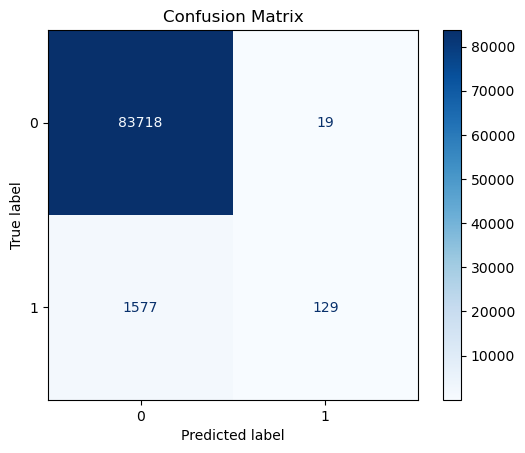

In [38]:
##################################### TO DO #######################################
## Feel free to add more cells and employ creative ideas to enhance performance. ##
###################################################################################
print("Performance of Best Logistic Regression Model Trained on Downsampled Dataset\n")
y_pred = cv.predict(X_test_unsampled_scaled)
evalute(y_pred, y_test, cv)
###################################################################################
###################################################################################
###################################################################################

#### Upsampled Dataset

In [39]:
######################################################
###################### TO DO #########################
######################################################

lr = LogisticRegression(random_state=42)
cv = GridSearchCV(
    lr,
    {
        "C": np.logspace(-3, 3, 7),
        "penalty": ["l1", "l2"]
    },
    cv=10,
    verbose=1
)
cv.fit(X_train_upsampled_scaled, y_train_upsampled)

print("\nCross-Validation Grid Search using Logistic Regression on Upsampled Dataset")
print("Tuned Hyperparameters:", cv.best_params_)
print("Accuracy:", cv.best_score_)

######################################################
######################################################
######################################################

Fitting 10 folds for each of 14 candidates, totalling 140 fits

Cross-Validation Grid Search using Logistic Regression on Upsampled Dataset
Tuned Hyperparameters: {'C': np.float64(10.0), 'penalty': 'l2'}
Accuracy: 0.9824138277560044


Performance of Best Logistic Regression Model Trained on Upsampled Dataset

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     84594
           1       0.85      0.15      0.25       849

    accuracy                           0.99     85443
   macro avg       0.92      0.57      0.62     85443
weighted avg       0.99      0.99      0.99     85443



<Figure size 640x480 with 0 Axes>

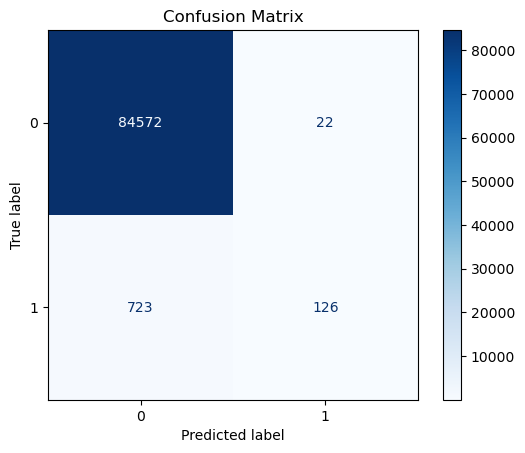

In [40]:
##################################### TO DO #######################################
## Feel free to add more cells and employ creative ideas to enhance performance. ##
###################################################################################
print("Performance of Best Logistic Regression Model Trained on Upsampled Dataset\n")
y_pred = cv.predict(X_test_upsampled_scaled)
evalute(y_pred, y_test, cv)
###################################################################################
###################################################################################
###################################################################################

#### Ensemble Learning using Balanced Bagging Classifier

In [41]:
base = LogisticRegression(C=1, random_state=42)
bbc = BalancedBaggingClassifier(estimator=base, n_estimators=10,
                                sampling_strategy=1, bootstrap=False,
                                random_state=42, verbose=1, n_jobs=-1)
bbc.fit(X_train_scaled, y_train)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    1.4s remaining:    4.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.5s finished


BalancedBaggingClassifier(bootstrap=False,
                          estimator=LogisticRegression(C=1, random_state=42),
                          n_jobs=-1, random_state=42, sampling_strategy=1,
                          verbose=1)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     83218
           1       0.88      0.06      0.11      2225

    accuracy                           0.98     85443
   macro avg       0.93      0.53      0.55     85443
weighted avg       0.97      0.98      0.96     85443



<Figure size 640x480 with 0 Axes>

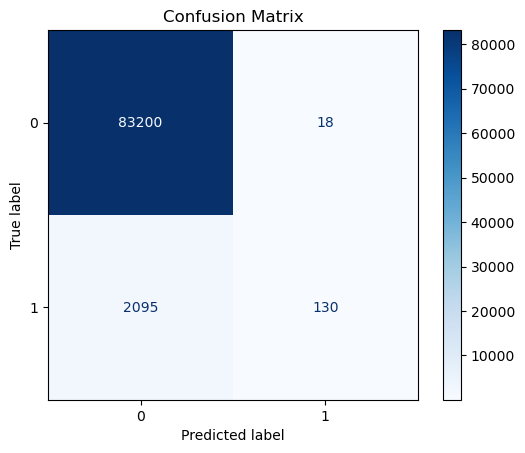

In [42]:
y_pred = bbc.predict(X_test_scaled)
evalute(y_pred, y_test, bbc)

### SVM

* [SVM practical example](https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/)

#### Original Dataset

In [43]:
######################################################
###################### TO DO #########################
######################################################

svm = SVC(C=10, kernel="rbf", random_state=42, verbose=2)
svm.fit(X_train_scaled, y_train)

######################################################
######################################################
######################################################

[LibSVM]....*...*
optimization finished, #iter = 7065
obj = -951.732501, rho = -0.837391
nSV = 2395, nBSV = 41
Total nSV = 2395


SVC(C=10, random_state=42, verbose=2)

Performance of SVM Model Trained on Original Dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85345
           1       0.64      0.97      0.77        98

    accuracy                           1.00     85443
   macro avg       0.82      0.98      0.89     85443
weighted avg       1.00      1.00      1.00     85443



<Figure size 640x480 with 0 Axes>

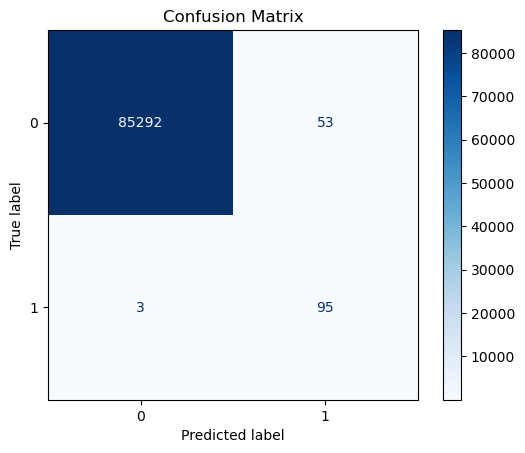

In [44]:
##################################### TO DO #######################################
## Feel free to add more cells and employ creative ideas to enhance performance. ##
###################################################################################
print("Performance of SVM Model Trained on Original Dataset\n")
y_pred = svm.predict(X_test_scaled)
evalute(y_pred, y_test, cv)
###################################################################################
###################################################################################
###################################################################################

#### Downsampled Dataset

In [45]:
######################################################
###################### TO DO #########################
######################################################

svm = SVC(random_state=42)
cv = GridSearchCV(
    svm,
    {
        "C": [0.1, 1, 10, 100, 1000],
        "gamma": [1, 0.1, 0.01, 0.001, 0.0001], 
        "kernel": ["rbf"]
    },
    cv=10,
    verbose=1
)
cv.fit(X_train_unsampled_scaled, y_train_unsampled)

print("\nCross-Validation Grid Search using SVM on Downsampled Dataset")
print("Tuned Hyperparameters:", cv.best_params_)
print("Accuracy:", cv.best_score_)

######################################################
######################################################
######################################################

Fitting 10 folds for each of 25 candidates, totalling 250 fits

Cross-Validation Grid Search using SVM on Downsampled Dataset
Tuned Hyperparameters: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy: 0.9418371696504689


Performance of Best SVM Trained on Downsampled Dataset

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     83342
           1       0.87      0.06      0.11      2101

    accuracy                           0.98     85443
   macro avg       0.92      0.53      0.55     85443
weighted avg       0.97      0.98      0.97     85443



<Figure size 640x480 with 0 Axes>

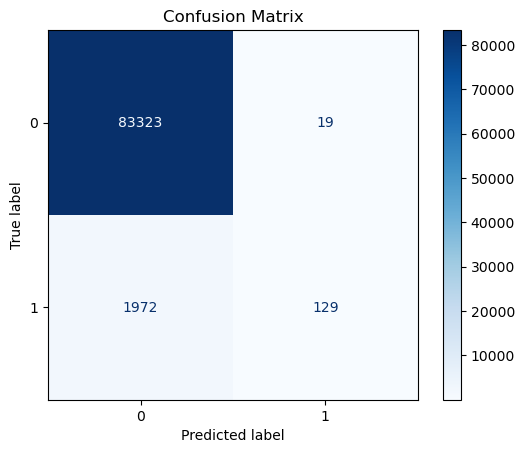

In [46]:
##################################### TO DO #######################################
## Feel free to add more cells and employ creative ideas to enhance performance. ##
###################################################################################
print("Performance of Best SVM Trained on Downsampled Dataset\n")
y_pred = cv.predict(X_test_unsampled_scaled)
evalute(y_pred, y_test, cv)
###################################################################################
###################################################################################
###################################################################################

#### Upsampled Dataset

In [47]:
######################################################
###################### TO DO #########################
######################################################

svm = SVC(C=10, kernel="rbf", random_state=42, verbose=2)
svm.fit(X_train_upsampled_scaled, y_train_upsampled)

######################################################
######################################################
######################################################

[LibSVM]................
*.........
*
optimization finished, #iter = 25196
obj = -23107.873696, rho = -5.936090
nSV = 3740, nBSV = 3190
Total nSV = 3740


SVC(C=10, random_state=42, verbose=2)

Performance of SVM Model Trained on Upsampled Dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85203
           1       0.72      0.44      0.55       240

    accuracy                           1.00     85443
   macro avg       0.86      0.72      0.77     85443
weighted avg       1.00      1.00      1.00     85443



<Figure size 640x480 with 0 Axes>

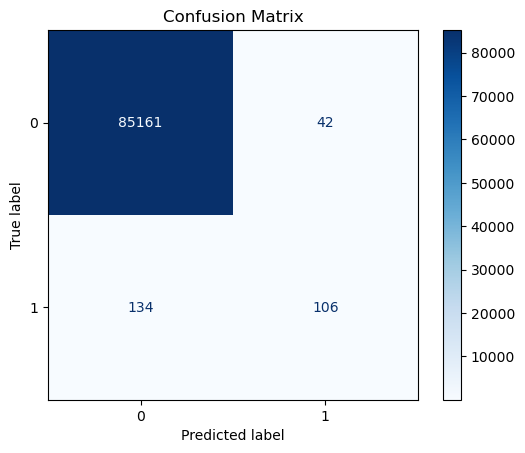

In [48]:
##################################### TO DO #######################################
## Feel free to add more cells and employ creative ideas to enhance performance. ##
###################################################################################
print("Performance of SVM Model Trained on Upsampled Dataset\n")
y_pred = svm.predict(X_test_upsampled_scaled)
evalute(y_pred, y_test, cv)
###################################################################################
###################################################################################
###################################################################################

#### Ensemble Learning using Balanced Bagging Classifier

In [49]:
base = SVC(C=1000, gamma=0.001, kernel="rbf", random_state=42)
bbc = BalancedBaggingClassifier(estimator=base, n_estimators=10,
                                sampling_strategy=1, bootstrap=False,
                                random_state=42, verbose=1, n_jobs=-1)
bbc.fit(X_train_scaled, y_train)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.2s remaining:    0.7s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.4s finished


BalancedBaggingClassifier(bootstrap=False,
                          estimator=SVC(C=1000, gamma=0.001, random_state=42),
                          n_jobs=-1, random_state=42, sampling_strategy=1,
                          verbose=1)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    1.1s remaining:    3.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.7s finished


              precision    recall  f1-score   support

           0       0.97      1.00      0.99     83102
           1       0.88      0.06      0.10      2341

    accuracy                           0.97     85443
   macro avg       0.93      0.53      0.55     85443
weighted avg       0.97      0.97      0.96     85443



<Figure size 640x480 with 0 Axes>

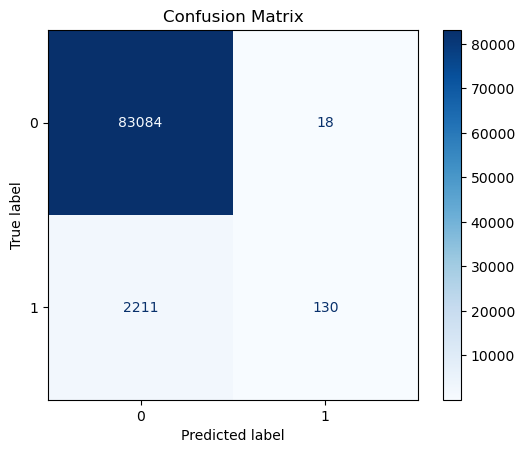

In [50]:
y_pred = bbc.predict(X_test_scaled)
evalute(y_pred, y_test, bbc)

### Multilayer Perceptron Classifier

#### Original Dataset

In [79]:
clf = MLPClassifier(hidden_layer_sizes=(32,8), random_state=42, max_iter=300, verbose=True).fit(X_train_scaled, y_train)

Iteration 1, loss = 0.01149209
Iteration 2, loss = 0.00321856
Iteration 3, loss = 0.00286589
Iteration 4, loss = 0.00255864
Iteration 5, loss = 0.00235007
Iteration 6, loss = 0.00211978
Iteration 7, loss = 0.00204904
Iteration 8, loss = 0.00194417
Iteration 9, loss = 0.00181838
Iteration 10, loss = 0.00178250
Iteration 11, loss = 0.00167341
Iteration 12, loss = 0.00163768
Iteration 13, loss = 0.00162095
Iteration 14, loss = 0.00160805
Iteration 15, loss = 0.00143761
Iteration 16, loss = 0.00146054
Iteration 17, loss = 0.00136619
Iteration 18, loss = 0.00140345
Iteration 19, loss = 0.00131058
Iteration 20, loss = 0.00128554
Iteration 21, loss = 0.00126158
Iteration 22, loss = 0.00127495
Iteration 23, loss = 0.00115102
Iteration 24, loss = 0.00112339
Iteration 25, loss = 0.00108679
Iteration 26, loss = 0.00109513
Iteration 27, loss = 0.00106915
Iteration 28, loss = 0.00102081
Iteration 29, loss = 0.00104061
Iteration 30, loss = 0.00096941
Iteration 31, loss = 0.00089142
Iteration 32, los

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85327
           1       0.73      0.93      0.82       116

    accuracy                           1.00     85443
   macro avg       0.86      0.97      0.91     85443
weighted avg       1.00      1.00      1.00     85443



<Figure size 640x480 with 0 Axes>

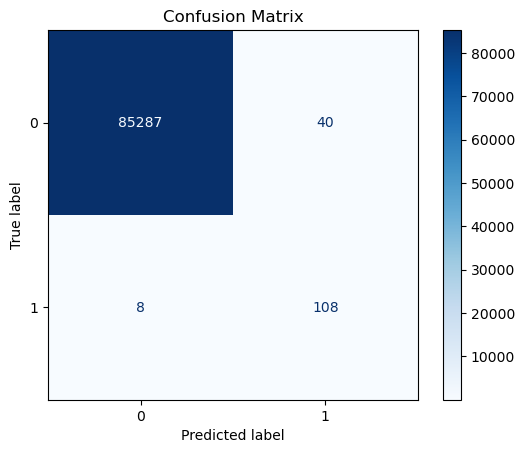

In [80]:
y_pred = clf.predict(X_test_scaled)
evalute(y_pred, y_test, clf)

#### Downsampled Dataset

In [87]:
clf = MLPClassifier(hidden_layer_sizes=(32,8), random_state=42, max_iter=1000, verbose=True).fit(X_train_unsampled_scaled, y_train_unsampled)

Iteration 1, loss = 1.18003107
Iteration 2, loss = 1.07129079
Iteration 3, loss = 0.97086936
Iteration 4, loss = 0.88500535
Iteration 5, loss = 0.81411993
Iteration 6, loss = 0.74843046
Iteration 7, loss = 0.69354340
Iteration 8, loss = 0.64539203
Iteration 9, loss = 0.60496139
Iteration 10, loss = 0.56913560
Iteration 11, loss = 0.53918419
Iteration 12, loss = 0.51298979
Iteration 13, loss = 0.49020126
Iteration 14, loss = 0.46967561
Iteration 15, loss = 0.45082134
Iteration 16, loss = 0.43338380
Iteration 17, loss = 0.41730854
Iteration 18, loss = 0.40175684
Iteration 19, loss = 0.38742772
Iteration 20, loss = 0.37328660
Iteration 21, loss = 0.36049480
Iteration 22, loss = 0.34797232
Iteration 23, loss = 0.33593686
Iteration 24, loss = 0.32433898
Iteration 25, loss = 0.31305929
Iteration 26, loss = 0.30253337
Iteration 27, loss = 0.29180633
Iteration 28, loss = 0.28215658
Iteration 29, loss = 0.27289863
Iteration 30, loss = 0.26383032
Iteration 31, loss = 0.25590588
Iteration 32, los

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     80336
           1       0.87      0.03      0.05      5107

    accuracy                           0.94     85443
   macro avg       0.91      0.51      0.51     85443
weighted avg       0.94      0.94      0.91     85443



<Figure size 640x480 with 0 Axes>

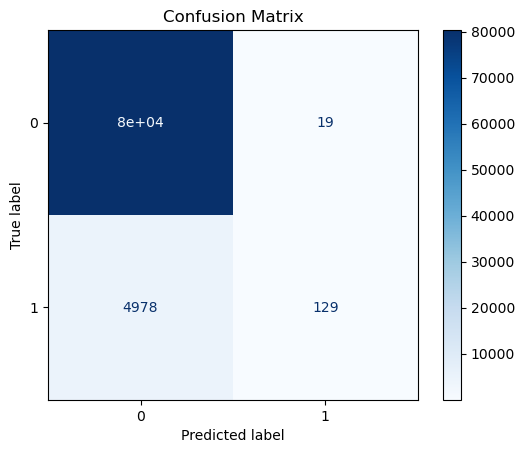

In [88]:
y_pred = clf.predict(X_test_unsampled_scaled)
evalute(y_pred, y_test, clf)

#### Upsampled Dataset

In [107]:
clf = MLPClassifier(hidden_layer_sizes=(32,8), random_state=42, max_iter=1000, verbose=True).fit(X_train_upsampled_scaled, y_train_upsampled)

Iteration 1, loss = 0.08441973
Iteration 2, loss = 0.01763773
Iteration 3, loss = 0.01032001
Iteration 4, loss = 0.00718053
Iteration 5, loss = 0.00514501
Iteration 6, loss = 0.00404524
Iteration 7, loss = 0.00334933
Iteration 8, loss = 0.00305604
Iteration 9, loss = 0.00283132
Iteration 10, loss = 0.00263632
Iteration 11, loss = 0.00219671
Iteration 12, loss = 0.00215532
Iteration 13, loss = 0.00202586
Iteration 14, loss = 0.00196309
Iteration 15, loss = 0.00171685
Iteration 16, loss = 0.00172854
Iteration 17, loss = 0.00171468
Iteration 18, loss = 0.00155052
Iteration 19, loss = 0.00139874
Iteration 20, loss = 0.00141467
Iteration 21, loss = 0.00144836
Iteration 22, loss = 0.00131365
Iteration 23, loss = 0.00142713
Iteration 24, loss = 0.00118982
Iteration 25, loss = 0.00113641
Iteration 26, loss = 0.00124479
Iteration 27, loss = 0.00103094
Iteration 28, loss = 0.00125985
Iteration 29, loss = 0.00106194
Iteration 30, loss = 0.00091566
Iteration 31, loss = 0.00123698
Iteration 32, los

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85221
           1       0.80      0.54      0.64       222

    accuracy                           1.00     85443
   macro avg       0.90      0.77      0.82     85443
weighted avg       1.00      1.00      1.00     85443



<Figure size 640x480 with 0 Axes>

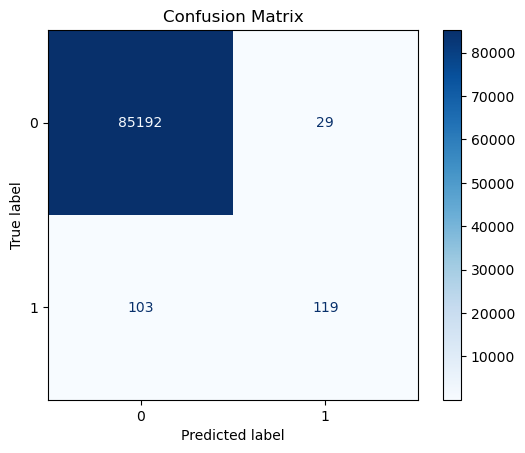

In [106]:
y_pred = clf.predict(X_test_upsampled_scaled)
evalute(y_pred, y_test, clf)

## Student Questions

1. Compare the SVM vs Logistic Regression model? Generally which one was better?
2. Is accuracy a suitable metric for evaluating performance in this problem? Explain your rationale.
3. If achieving high recall is crucial for our problem, what recommendations do you have to enhance this metric specifically for this dataset?

  **Student Answer:** 

1. According to the obtained F1 score, SVM generally performs better than Logistic Regression. The highest F1 score obtained by both models is when they are trained on original dataset. In this case, SVM defeats Logistic Regression and achieves 0.89. Grid search is needed to tune the hyperparameters of SVM when using original dataset, and the performance may enhance.

3. As the train set is highly unbalanced, the accuracy is not an appropriate metric to evaluate the performance of models. In this case, the mistakes of model on predicting the label of records in the minor class don't have a sufficient effect on accuracy. So we use F1 score as it doesn't have this shortage.

4. I have tested upsampling and downsampling techniques to make the train dataset balanced in order to overcome this problem. But interestingly, the recall, precision, and F1 score reduced in most cases. Balanced bagging classifier is also tested and the results are not promising. Trying to handling outlier data points or using more complex models, like multilayer perceptrons may be a further reasonable attempt.

# Unsupervised Image Segmentation using Clustering!

Image segmentation is a crucial step in image processing and is essential for analyzing image contents. For instance, to determine if an indoor image contains a chair or a person, image segmentation can be used to isolate and examine each object individually. It typically precedes tasks like pattern recognition, feature extraction, and image compression.

Image segmentation involves classifying an image into various groups. Extensive research has been conducted in this field, particularly using clustering techniques. Among these, the K-Means clustering algorithm is one of the most widely used methods.

The process of image segmentation transforms an image into a set of pixel regions, represented by a mask or a labeled image. This segmentation allows for the targeted processing of significant image segments rather than the entire image.

In this section we want to demonstrate K-Mean able to cluster similar pixel properly. and finaly segment components of an image!

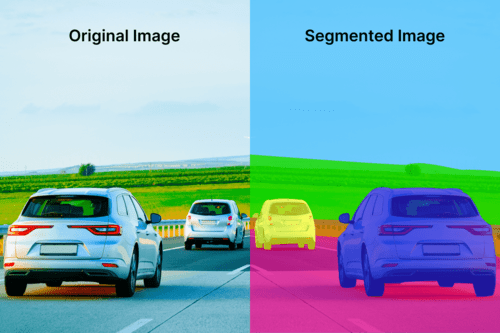

## Load Data

In [51]:
import warnings
warnings.filterwarnings("ignore")

In [52]:
# Image Link (You can download and upload it): https://drive.google.com/file/d/16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb/view?usp=sharing
# !gdown 16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb

In [53]:
im = cv2.imread('./elephant.jpg') # Reads an image into BGR Format
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(330, 500, 3)


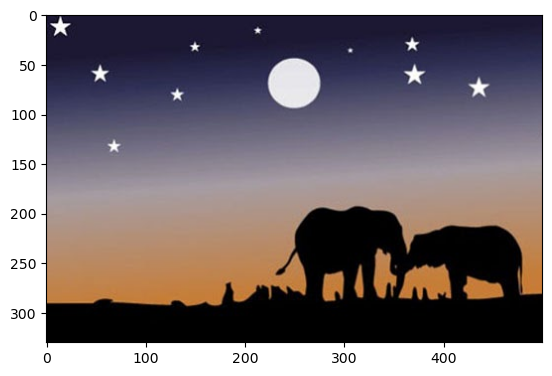

In [54]:
plt.imshow(im) # as RGB Format
plt.show()

In [55]:
# Flatten Each channel of the Image
all_pixels = im.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


## Number of Dominant Colors in Image

The optimal number of clusters when clustering all pixels represents the predominant colors in an image.








k=3: Intertia = 308718439.1572
k=4: Intertia = 206964613.1148
k=5: Intertia = 130429158.4489
k=6: Intertia = 77471269.0879
k=7: Intertia = 54038013.7168
k=8: Intertia = 43074095.8709
k=9: Intertia = 32896953.0827
k=10: Intertia = 29370658.4378
k=11: Intertia = 24039872.6076
k=12: Intertia = 20869856.4160
k=13: Intertia = 18973104.6976
k=14: Intertia = 16924956.8156
k=15: Intertia = 13996207.1989
k=16: Intertia = 12449352.1563
k=17: Intertia = 11374810.0858
k=18: Intertia = 10549708.7202
k=19: Intertia = 9699131.5966
k=20: Intertia = 8924861.7493
k=21: Intertia = 8513283.9634
k=22: Intertia = 7982897.0142
k=23: Intertia = 7423351.0788
k=24: Intertia = 6875822.9208


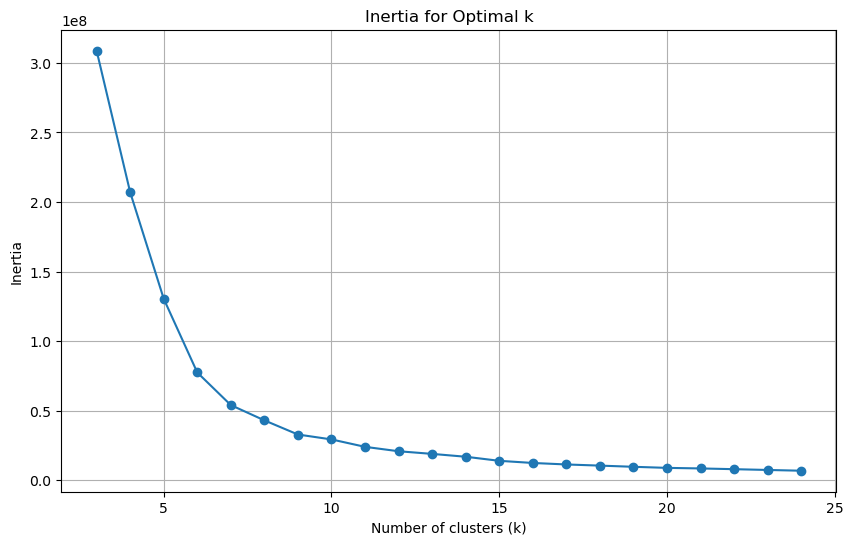

In [56]:
# Elbow Method or # Silhouette Score
######################################################
###################### TO DO #########################
######################################################

silhouette_scores = []
inertias = []
k_values = range(3, 25)

for k in k_values:
    kmeans = KMeans(max_iter=100, n_clusters=k, random_state=42, verbose=False)
    labels = kmeans.fit_predict(all_pixels)
    inertia = kmeans.inertia_
    inertias.append(inertia)
    # score = silhouette_score(all_pixels, labels)
    # silhouette_scores.append(score)
    # print(f"k={k}: Silhouette Score = {score:.4f}")
    print(f"k={k}: Intertia = {inertia:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, marker='o')
plt.title('Inertia for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# plt.figure(figsize=(10, 6))
# plt.plot(k_values, silhouette_scores, marker='o')
# plt.title('Silhouette Score Method for Optimal k')
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('Silhouette Score')
# plt.grid(True)
# plt.show()

######################################################
######################################################
######################################################


## Visualize Dominant Color

In [57]:
# Now that you have the number of dominant colors (clusters),
# use clustering to determine the cluster of each pixel.
######################################################
###################### TO DO #########################
######################################################
dominant_colors =7
kmeans = KMeans(n_clusters=dominant_colors, random_state=42)
######################################################
######################################################
######################################################
kmeans.fit(all_pixels)

KMeans(n_clusters=7, random_state=42)

In [58]:
kmeans.cluster_centers_.shape

(7, 3)

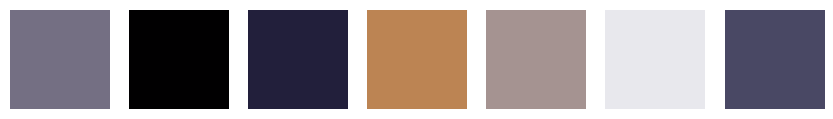

In [59]:
#######Plot the each of dominant color as image#######
####### Dominant colors are center of cluster ########
###################### TO DO #########################
fig, axs = plt.subplots(1, dominant_colors, figsize=(dominant_colors * 1.5, 1.5))

for i, ax in enumerate(axs):
    Xt = np.zeros((64, 64, 3))
    Xt[:, :, :] = kmeans.cluster_centers_[i, :] / 255
    ax.imshow(Xt)
    ax.axis("off")

######################################################
######################################################
######################################################

## Segmenting original image

In [60]:
new_img = np.zeros((330*500,3),dtype='uint8')
print(new_img.shape)

(165000, 3)


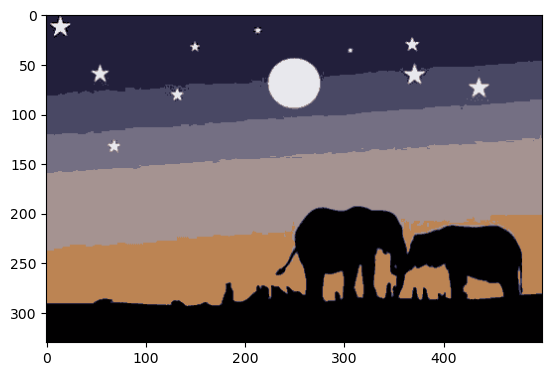

In [61]:
colors = kmeans.cluster_centers_
lables = kmeans.labels_

# Iterate over the image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[lables[ix]]

new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()